In [1]:
# referenced code here: https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

aapl = pd.read_csv("Dataset\Equities\AAPL.csv")
meta = pd.read_csv("Dataset\Equities\META.csv")
orcl = pd.read_csv("Dataset\Equities\ORCL.csv")

df_aapl = pd.DataFrame(data=aapl)
df_meta = pd.DataFrame(data=meta)
df_orcl = pd.DataFrame(data=orcl)
df_aapl.rename(columns={"Close": "aapl_close"}, inplace=True)
df_meta.rename(columns={"Close": "meta_close"}, inplace=True)
df_orcl.rename(columns={"Close": "orcl_close"}, inplace=True)
# print(df_aapl)

aapl_close = df_aapl["aapl_close"]
meta_close = df_meta["meta_close"]
orcl_close = df_orcl["orcl_close"]


# print(aapl_close)
# print(meta_close)
# print(orcl_close)
assert aapl_close.shape == meta_close.shape == orcl_close.shape

date = pd.to_datetime(df_aapl["Date"])
portfolio = pd.DataFrame(date)
portfolio = portfolio.join(aapl_close)
portfolio = portfolio.join(meta_close)
portfolio = portfolio.join(orcl_close)
# print(portfolio)
# print(f"portfolio shape: {portfolio.shape}")

portfolio.set_index('Date', inplace=True)

In [3]:
portfolio

,aapl_close,meta_close,orcl_close
Date,,,
2014-05-27,22.343929,63.480000,41.910000
2014-05-28,22.286072,63.509998,41.570000
2014-05-29,22.692142,63.830002,42.200001
2014-05-30,22.607143,63.299999,42.020000
2014-06-02,22.451786,63.080002,41.970001
...,...,...,...
2024-05-20,191.039993,468.839996,124.519997
2024-05-21,192.350006,464.630005,124.629997
2024-05-22,190.899994,467.779999,124.599998


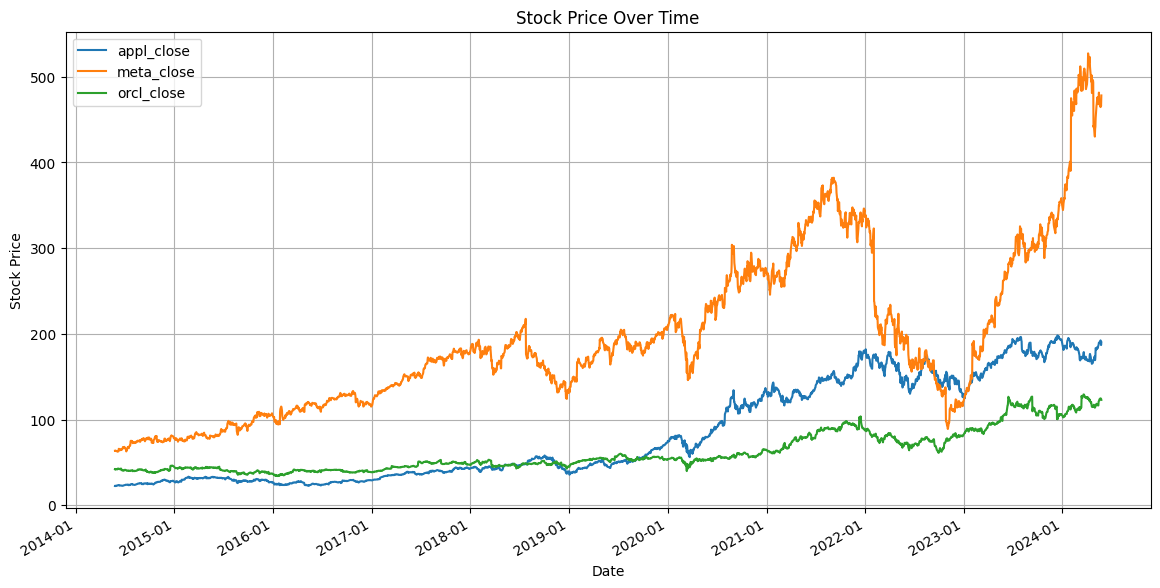

In [4]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(portfolio["aapl_close"], label="appl_close")
ax.plot(portfolio["meta_close"], label="meta_close")
ax.plot(portfolio["orcl_close"], label="orcl_close")

ax.legend()

# Format x-ticks
ax.xaxis.set_major_locator(mdates.YearLocator())  # to display one tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # to format the date as 'YYYY-MM'

# Rotate date labels automatically
fig.autofmt_xdate()

ax.set_title('Stock Price Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.grid(True)

plt.show()